## Model Evaluaiton : 
It help us to understand how accurate the our model is.
To do 
1. Accuracy Score
2. Confussion Matrix
________________________________________________________________________________
Different model have different model evaluation methods like : 
1. Classsification : Accuracy Score is used

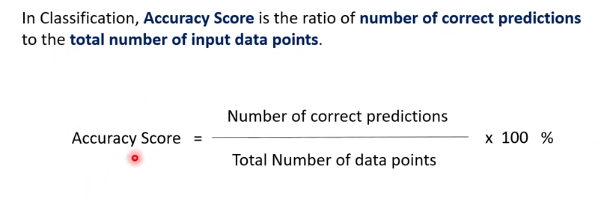 
If the accuracy score is not reliable when the dataset has an uneven distribution of classes.
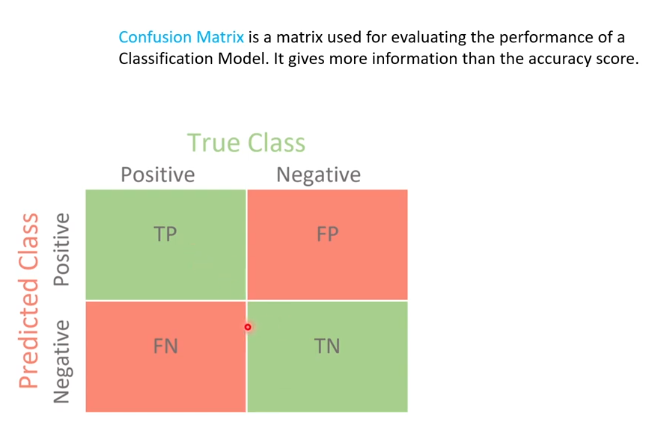
Advantage of confussion matrix are even thoug the data is not reliabe but it predict the correct output. 

2. Regression      : Mean Absolute Error is used

 

In [1]:
# impelmentation of model
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Loding the dataset 
data = pd.read_csv(r"C:\Users\utkar\100 days ML\Heart Disease Prediction\heart_disease_data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# last five data
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# checking the null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# spliting the data into feature and target 
x = data.drop(columns = 'target' ,axis = 1)
y = data['target']

In [9]:
print(x)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [10]:
data['target'].value_counts() # 1 for defective and 0 for healthy

target
1    165
0    138
Name: count, dtype: int64

In [11]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [12]:
# train test split 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size= 0.2,stratify=y,random_state=2)

In [13]:
print(x.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train,Y_train)

C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
LogisticRegression(max_iter = 1000)

LogisticRegression(max_iter=1000)

# model Evaluation 


In [17]:
X_train_pediction = model.predict(X_train)
train_data_accuracy = accuracy_score(Y_train,X_train_pediction)
print("The accuracy score is : ",train_data_accuracy )

The accuracy score is :  0.8512396694214877


In [18]:
print("The accuracy score is : ", round(train_data_accuracy*100,2),'%')

The accuracy score is :  85.12 %


In [19]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test ,X_test_prediction )
print("The accuracy score of test data is :",test_data_accuracy)

The accuracy score of test data is : 0.819672131147541


In [20]:
print("The accuracy score is : ", round(test_data_accuracy*100,2),'%')

The accuracy score is :  81.97 %


# Confusion Matrix

In [21]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction )
print(cf_matrix)

[[23  5]
 [ 6 27]]


In [22]:
tn,fp,fn,tp = cf_matrix.ravel()
print(tn,fp,fn,tp)

23 5 6 27


<Axes: >

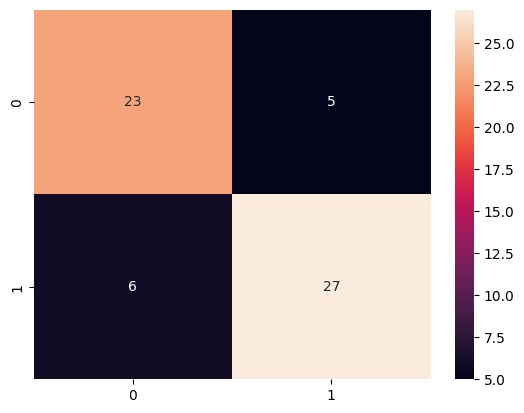

In [23]:
import seaborn as sns 
sns.heatmap(cf_matrix, annot = True)

#### Confussion matrix tells the number of correct prediction and number of incorrect prediction. 
##### But Accuracy score tell the percentage of correct prediction.

#  Precision , Recall and F1 Score 
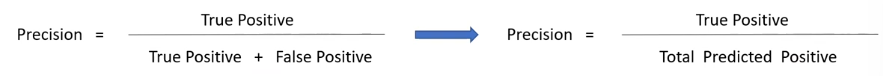

##### Precision is the ratio of number of true positive to the total number of predicted positive. It measures , out of the total predicted positive, how many are actually positive. It measures the error caused by False Positives. Hence it is a good evaluation metric when False Positive predictions are critical. Example : Face Authentication

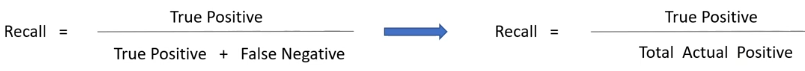

##### Recall is the ratio of number of true positive to the total number of actual positive.It measures , out of the total actual positive, how many are predicted as True Positive.It measures the error caused by False Negative.Hence it is a good evaluation metric when False Negative predictions are critical. Example : Cancer Diagnosis

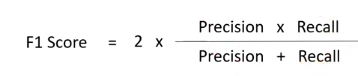
##### F1 Score is an important evaluation metric for binary classification the combine Precision and Recall.F1 Score is the harmonic mean of Precision and Recall. This is a very useful metric when a dataset has imbalanced classes.

## range between 0 and 1

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Using the same dataset heart data 

In [34]:
# Precision Score
X_train_pediction = model.predict(X_train)
train_data_accuracy = precision_score(Y_train,X_train_pediction)
print("The precision score is : ",train_data_accuracy )

The precision score is :  0.8287671232876712


In [35]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = precision_score(Y_test ,X_test_prediction )
print("The precision score of test data is :",test_data_accuracy)

The precision score of test data is : 0.84375


In [36]:
# Recall Score 
X_train_pediction = model.predict(X_train)
train_data_accuracy = recall_score(Y_train,X_train_pediction)
print("The recall score is : ",train_data_accuracy )

The recall score is :  0.9166666666666666


In [37]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = recall_score(Y_test ,X_test_prediction )
print("The recall score of test data is :",test_data_accuracy)

The recall score of test data is : 0.8181818181818182


In [38]:
# f1 Score 
X_train_pediction = model.predict(X_train)
train_data_accuracy = f1_score(Y_train,X_train_pediction)
print("The f1 score is : ",train_data_accuracy )

The f1 score is :  0.8705035971223022


In [39]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = f1_score(Y_test ,X_test_prediction )
print("The f1 score of test data is :",test_data_accuracy)

The f1 score of test data is : 0.8307692307692308
